In [476]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [477]:
df= pd.read_csv(r"C:\Users\dell\Documents\Data analysis\OASIS INFOBYTE\Wine quality prediction\WineQT.csv")

In [478]:
df.shape

(1143, 13)

In [479]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [481]:
df.groupby('quality').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
quality,,,,,,,,,,,,
3,6,6,6,6,6,6,6,6,6,6,6,6
4,33,33,33,33,33,33,33,33,33,33,33,33
5,483,483,483,483,483,483,483,483,483,483,483,483
6,462,462,462,462,462,462,462,462,462,462,462,462
7,143,143,143,143,143,143,143,143,143,143,143,143
8,16,16,16,16,16,16,16,16,16,16,16,16


In [482]:
#as there is class imbalance we will group quality as following
quality_encoded= []
for i in df['quality']:
    if i<5:
        i = 0 
    elif ((i==5)|(i==6)):
        i = 1
    else:
        i=2
    quality_encoded.append(i)
df['quality_encoded']=quality_encoded

In [483]:
df['quality_encoded']

0       1
1       1
2       1
3       1
4       1
       ..
1138    1
1139    1
1140    1
1141    1
1142    1
Name: quality_encoded, Length: 1143, dtype: int64

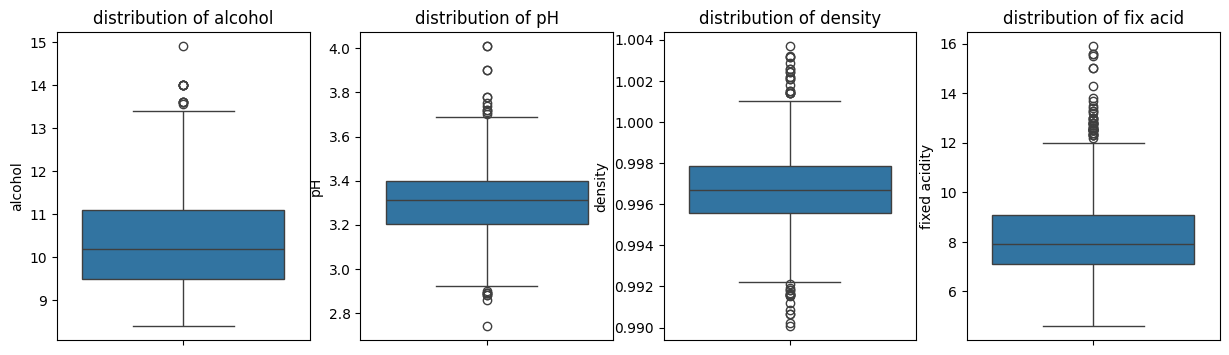

In [484]:
plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
sns.boxplot(data = df['alcohol'])
plt.title('distribution of alcohol')

plt.subplot(1,4,2)
sns.boxplot(data = df['pH'])
plt.title('distribution of pH')

plt.subplot(1,4,3)
sns.boxplot(data = df['density'])
plt.title('distribution of density')

plt.subplot(1,4,4)
sns.boxplot(data = df['fixed acidity'])
plt.title('distribution of fix acid')
plt.show()


In [485]:
df = df[df['fixed acidity']<=11]
df = df[(df['pH']>=3)& (df['pH']<=3.5)]
df = df[df['density']>0.993]

df=df[df['density']<1.00]

In [486]:
df.shape

(865, 14)

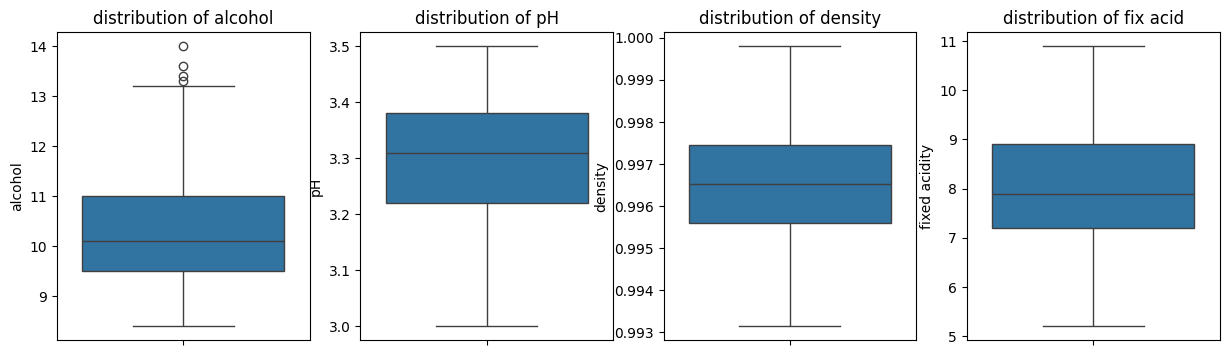

In [487]:
plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
sns.boxplot(data = df['alcohol'])
plt.title('distribution of alcohol')

plt.subplot(1,4,2)
sns.boxplot(data = df['pH'])
plt.title('distribution of pH')

plt.subplot(1,4,3)
sns.boxplot(data = df['density'])
plt.title('distribution of density')

plt.subplot(1,4,4)
sns.boxplot(data = df['fixed acidity'])
plt.title('distribution of fix acid')
plt.show()


In [488]:
df['T_acidity'] = df['fixed acidity']+df['volatile acidity']+df['citric acid']

In [489]:
df.drop(columns = 'quality')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id,quality_encoded,T_acidity
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,1,8.68
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2,1,8.60
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,6,1,8.56
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,2,7.95
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,8,2,8.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,7.5,0.31,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4,1586,1,8.22
1136,6.3,0.55,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,1590,1,7.00
1138,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1592,1,6.94
1139,6.8,0.62,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1593,1,7.50


In [490]:
feature_df =df[['T_acidity','density','alcohol','pH'	]]

In [491]:
from sklearn.preprocessing import StandardScaler

In [492]:
scaler = StandardScaler()

In [493]:
scaled_df = scaler.fit_transform(feature_df)

In [494]:
scaled_df =pd.DataFrame(scaled_df)

In [495]:
from sklearn.model_selection import train_test_split

In [496]:
from sklearn.svm import SVC

In [497]:
from sklearn.metrics import classification_report, confusion_matrix

In [498]:
x= scaled_df
y = df['quality_encoded']

In [499]:
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [500]:
model = SVC(class_weight= 'balanced')

In [501]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [502]:
cr = classification_report(y_pred, y_test)
cm= confusion_matrix(y_pred, y_test)

In [504]:
print(cm)

[[ 3 40  4]
 [ 3 84  1]
 [ 0 26 12]]


In [514]:
print(cr)

              precision    recall  f1-score   support

           0       0.50      0.06      0.11        47
           1       0.56      0.95      0.71        88
           2       0.71      0.32      0.44        38

    accuracy                           0.57       173
   macro avg       0.59      0.44      0.42       173
weighted avg       0.58      0.57      0.49       173

